In [2]:

source('lib.r')


In [3]:
conS = readRDS('/home/meisl/Workplace/RCC/Figures.V2/conos.RCC.stromal.rds')
p2S=readRDS('Stromal.N.PT_p2combined.rds')


In [6]:
anoS = conS$misc$cell.type
ssamp = conS$misc$sample
stype =  conS$misc$fraction

load('~/Workplace/RCC/Figures.V2/F5.stromal/F5_stromal.RData')


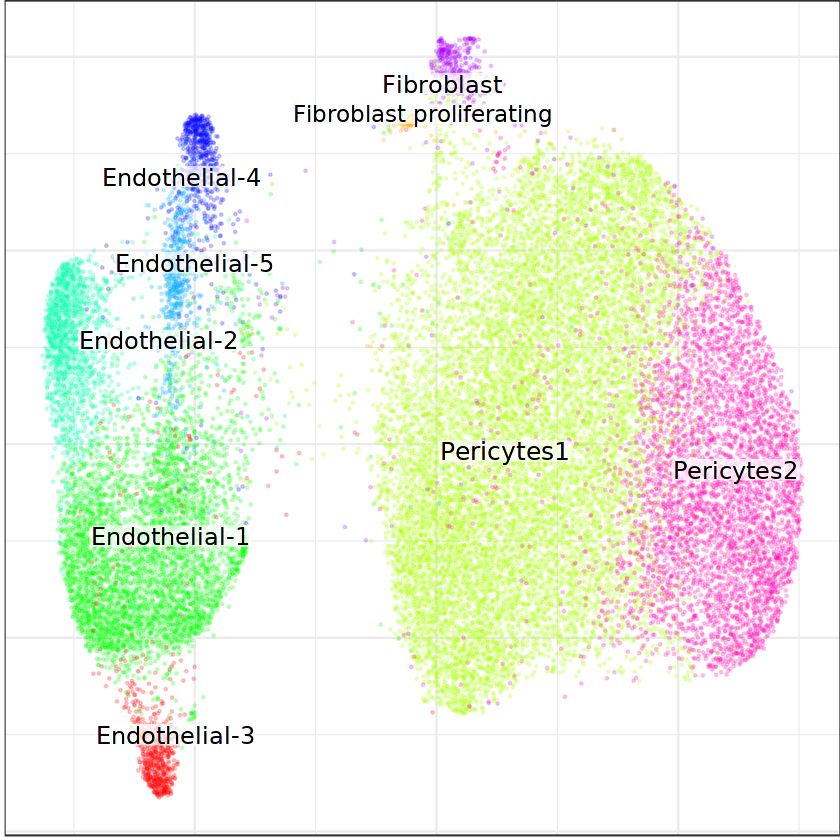

In [7]:
anoS=as.factor(anoS)
anoS.pal <- setNames(sample(rainbow(length(levels(anoS)))),levels(anoS));

anoS.palf <- function(n) return(anoS.pal)

a2=conS$plotGraph(groups=anoS,plot.na=F,palette=anoS.palf,size=0.3,alpha=0.2,font.size = c(4.8, 5.2))
a2

Using SampleType as value column: use value.var to override.



,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,Endothelial-1,RCC-BM1-Normal,0.4035714
2,Endothelial-2,RCC-BM1-Normal,0.1473214
3,Endothelial-3,RCC-BM1-Normal,0.1526786
4,Endothelial-4,RCC-BM1-Normal,0.1589286
5,Endothelial-5,RCC-BM1-Normal,0.1375000
6,Endothelial-1,RCC-BM1-PTumor,0.6037736


Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


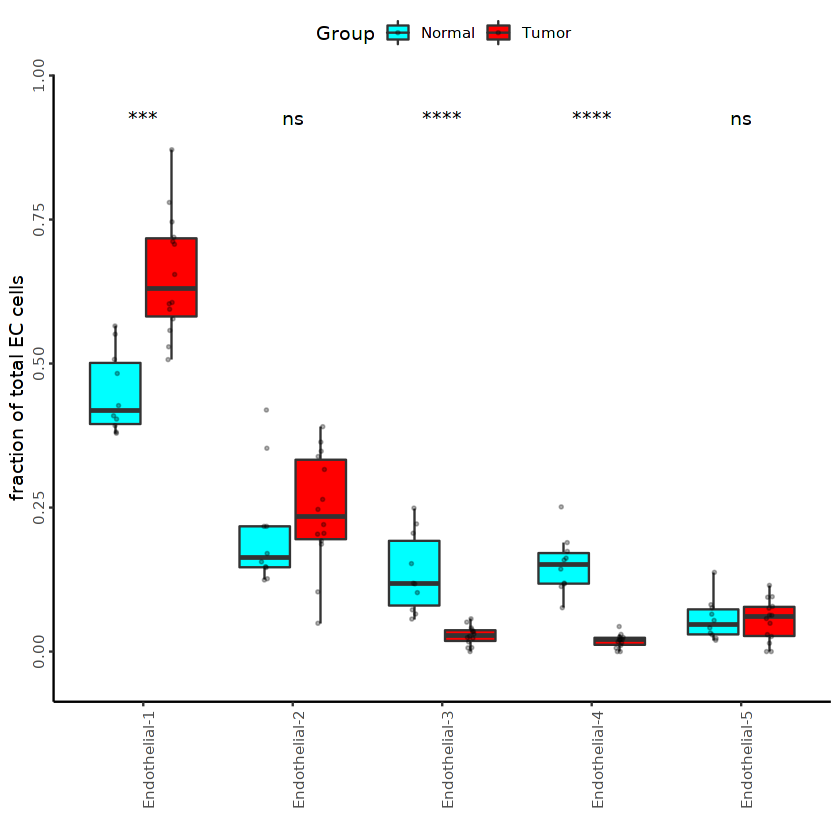

In [8]:
t.ano2 = anoS[grepl('Endo',anoS)] %>% Toch()


cname=names(t.ano2)
ano2=data.frame('Cell'=t.ano2[cname],'SampleType'=ssamp[cname])

# Annotation vs sample
tmp2 <- acast(ano2, Cell ~ SampleType, fun.aggregate=length)

tmp3 <- (sweep(tmp2, 2, colSums(tmp2), FUN='/'))
tmp4 <- melt(tmp3)
head(tmp4)

names(tmp4) <- c('cell', 'sample','pc.of.sample')

tmp4$Group=NULL
tmp4$Group=sample.groups[as.character(tmp4$sample)]


p <- ggplot(na.omit(tmp4),aes(x=cell,y=pc.of.sample,dodge=Group,fill=Group))+geom_boxplot(notch=FALSE,outlier.shape=NA)  +  geom_point(position = position_jitterdodge(jitter.width=0.1),color=adjustcolor(1,alpha=0.3),pch=19,size=0.5)+theme_classic()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text.y = element_text(angle = 90, hjust = 0.5))  +xlab("") +ylab("fraction of total EC cells")+theme(legend.position="top")+
  scale_fill_manual(values=fraction.palette1)+
 scale_y_continuous( expand=c(0, max(tmp4$pc.of.sample) * 0.1), limits=c(0, (max(tmp4$pc.of.sample) + max(tmp4$pc.of.sample) * 0.05 )))  #expand=c(0, 0),

p=p+ ggpubr::stat_compare_means(label = "p.signif", label.x = 1.5) 
p


Using SampleType as value column: use value.var to override.



,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,Pericytes1,RCC-BM1-Normal,0.5367545
2,Pericytes2,RCC-BM1-Normal,0.4632455
3,Pericytes1,RCC-BM1-PTumor,0.8115942
4,Pericytes2,RCC-BM1-PTumor,0.1884058
5,Pericytes1,RCC-BM2-Normal,0.4128440
6,Pericytes2,RCC-BM2-Normal,0.5871560


Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


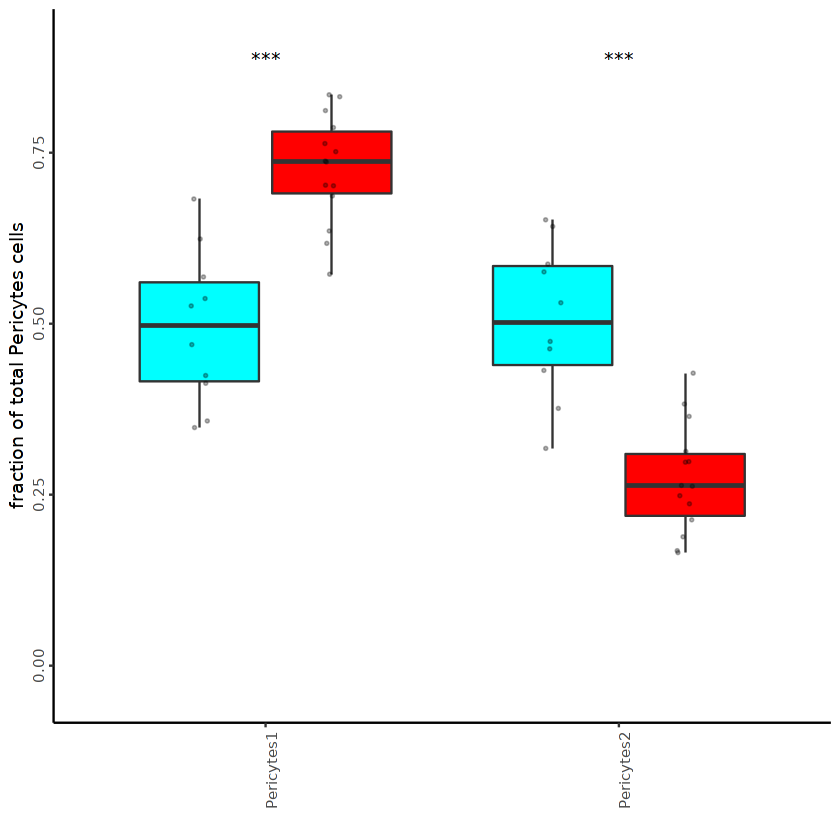

In [9]:
t.ano2 = anoS[grepl('Pericytes',anoS)] %>% Toch()


cname=names(t.ano2)
ano2=data.frame('Cell'=t.ano2[cname],'SampleType'=ssamp[cname])

# Annotation vs sample
tmp2 <- acast(ano2, Cell ~ SampleType, fun.aggregate=length)

tmp3 <- (sweep(tmp2, 2, colSums(tmp2), FUN='/'))
tmp4 <- melt(tmp3)
head(tmp4)

names(tmp4) <- c('cell', 'sample','pc.of.sample')

tmp4$Group=NULL
tmp4$Group=sample.groups[as.character(tmp4$sample)]


p <- ggplot(na.omit(tmp4),aes(x=cell,y=pc.of.sample,dodge=Group,fill=Group))+geom_boxplot(notch=FALSE,outlier.shape=NA)  +  geom_point(position = position_jitterdodge(jitter.width=0.1),color=adjustcolor(1,alpha=0.3),pch=19,size=0.5)+theme_classic()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text.y = element_text(angle = 90, hjust = 0.5))  +xlab("") +ylab("fraction of total Pericytes cells")+theme(legend.position="none")+
  scale_fill_manual(values=fraction.palette1)+
 scale_y_continuous( expand=c(0, max(tmp4$pc.of.sample) * 0.1), limits=c(0, (max(tmp4$pc.of.sample) + max(tmp4$pc.of.sample) * 0.05 )))  #expand=c(0, 0),

p=p+ ggpubr::stat_compare_means(label = "p.signif", label.x = 1.5) 
p

In [10]:
t.ano2 = anoS[grepl('Endo',anoS)] %>% Toch()
t.ano3 = anoS[grepl('Pericytes',anoS)] %>% Toch()

DEheatmap(p2S,t.ano2,ssamp[names(t.ano2)],'EC')
DEheatmap(p2S,t.ano3,ssamp[names(t.ano3)],'Peri')

Warning message in p2myeloid$getDifferentialGenes(groups = conosCluster):
“cluster vector doesn't specify groups for all of the cells, dropping missing cells from comparison”
Warning message in p2myeloid$getDifferentialGenes(groups = conosCluster):
“cluster vector doesn't specify groups for all of the cells, dropping missing cells from comparison”


[1] "ACVRL1"  "JAG1"    "ANGPT1"  "ANGPT2"  "CD34"    "CDC42"   "MAPK14" 
 [8] "TYMP"    "EDN1"    "EFNB2"   "EGR3"    "EPHB4"   "PTK2B"   "FGF2"   
[15] "FGFR1"   "VEGFD"   "FOXC2"   "FLT1"    "FLT4"    "FN1"     "GPLD1"  
[22] "NR4A1"   "ID1"     "ITGA5"   "ITGAV"   "ITGB1"   "KDR"     "LOXL2"  
[29] "MMP14"   "NOTCH1"  "PDGFA"   "PDGFRB"  "PGF"     "PIK3CA"  "PTGS2"  
[36] "PTK2"    "ROBO1"   "SHC1"    "SRF"     "TAL1"    "TDGF1"   "TEK"    
[43] "VAV2"    "VEGFA"   "VEGFC"   "FGF18"   "NRP1"    "SEMA5A"  "RAMP2"  
[50] "CIB1"    "ESM1"    "JMJD6"   "HEY1"    "ADGRA2"  "GREM1"   "SRPX2"  
[57] "SOX18"   "PARVA"   "RNF213"  "E2F8"    "RSPO3"   "OTULIN"  "E2F7"   
[64] "CCBE1"   "BMPER"   "NRARP"   "TNFAIP6" "VCAN"    "SPP1"    "CCND2"  
[71] "PIK3R1"  "STC1"    "JAG2"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.02872 0.03876 0.04087 0.04988 0.15355 


Warning message:
“Computation failed in `stat_compare_means()`:
Problem with `mutate()` column `p`.
ℹ `p = purrr::map(...)`.
✖ all observations are in the same group”
Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


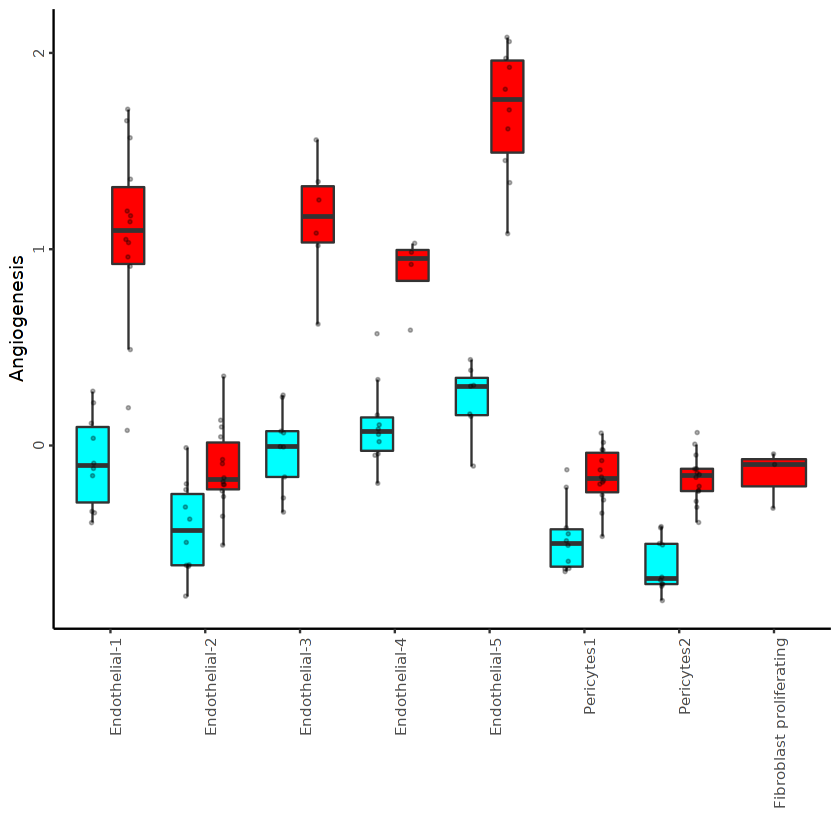

In [13]:

# Angiogenesis signature score
gg2=read.csv('Angiogenesis.txt',sep='\t',header=T)
gg2=as.character(gg2[,2])
gg2
gs = gg2
ylab = 'Angiogenesis'


cname = names(anoS)
#cname = intersect(cname,rownames(p2S$counts))
cname = intersect(cname,names(stype))

df=Signature_score(anoS[cname],gs,p2S$counts,stype[cname],ssamp,min.num.cell=5,magnitude.normal = TRUE)
# drawBoxplot(ylab,df,ylab,myeloid.col=anoS.pal,limHeight=1.35,height=2.7,width=2.4,sigl=c(''))

df = df[df$cell!='Fibroblast',]
p <- ggplot(na.omit(df),aes(x=cell,y=score,dodge=fraction,fill=fraction))+geom_boxplot(notch=FALSE,outlier.shape=NA)  +  geom_point(position = position_jitterdodge(jitter.width=0.1),color=adjustcolor(1,alpha=0.3),pch=19,size=0.5)+theme_classic()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text.y = element_text(angle = 90, hjust = 0.5))  +xlab("") +ylab(ylab)+theme(legend.position="none")+
  scale_fill_manual(values=fraction.palette1)#+
# scale_y_continuous( expand=c(0, max(df$score) * 0.1), limits=c(0, (max(df$score) + max(df$score) * 0.05 )))  #expand=c(0, 0),

p1=p+ ggpubr::stat_compare_means(label = "p.signif", label.x = 1.5) 
p1

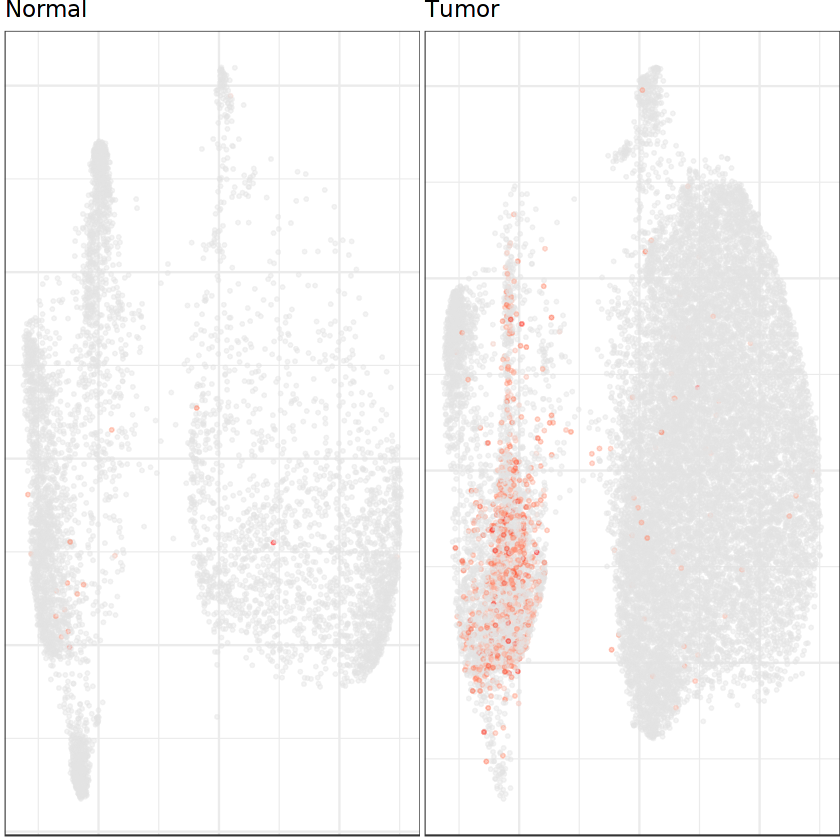

In [15]:
# UMAP visulization of gene expression in Normal and Tumor fraction
emb.exp = function(scon,gene,anoS,stype,size=0.2,nrow = 2,ncol=2,output = 'test'){
  cname = intersect(names(anoS),names(stype))
  t.dtype = stype[cname]
  table(t.dtype)

  #gene='FAP'
  fig = list()
  t= conos:::getGeneExpression(scon,gene)

  for (i in levels(t.dtype)){
    cname=names(t.dtype[t.dtype==i])
    col=t[cname]
    col[1]=max(t)
    a=scon$plotGraph(colors=col,raster=TRUE,alpha=0.4,plot.na=F)+ggtitle(i)
    fig[[i]]=a
  }
  b=  cowplot::plot_grid(plotlist=fig, ncol=nrow, nrow=ncol)
  ggsave(paste(gene,'.',output,'.pdf',sep=''),b,width = 2.5*nrow,height=2.5*ncol)

  return(b)
}
emb.exp(conS,gene='KCNE3',anoS,as.factor(stype),size=0.1,nrow = 2,ncol=1,output = 'KCNE3')

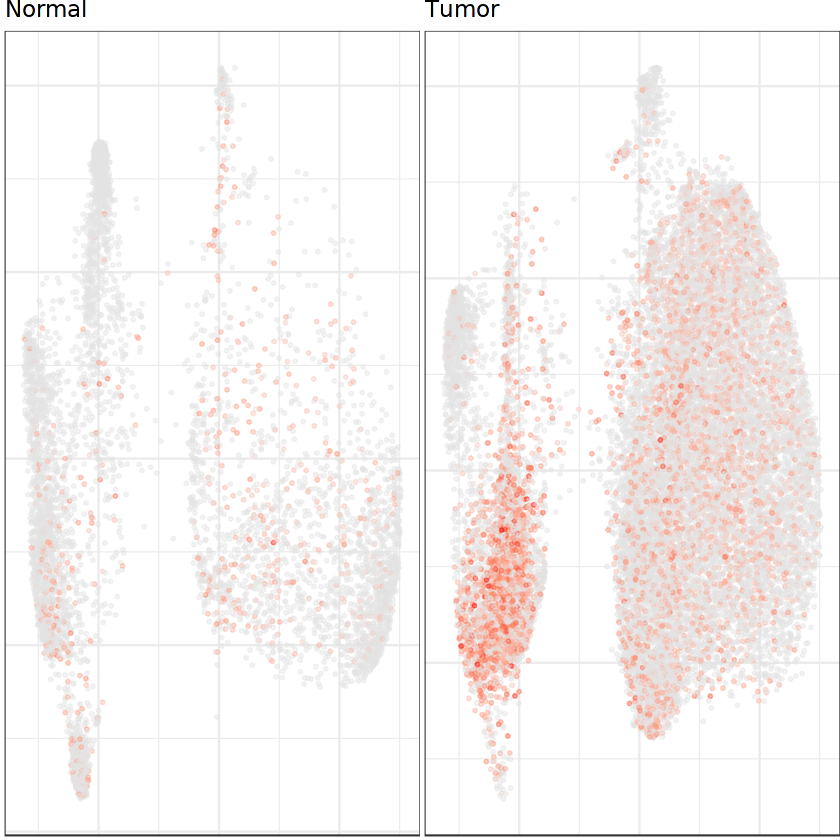

In [16]:
emb.exp(conS,gene='EDNRB',anoS,as.factor(stype),size=0.1,nrow = 2,ncol=1,output = 'KCNE3')

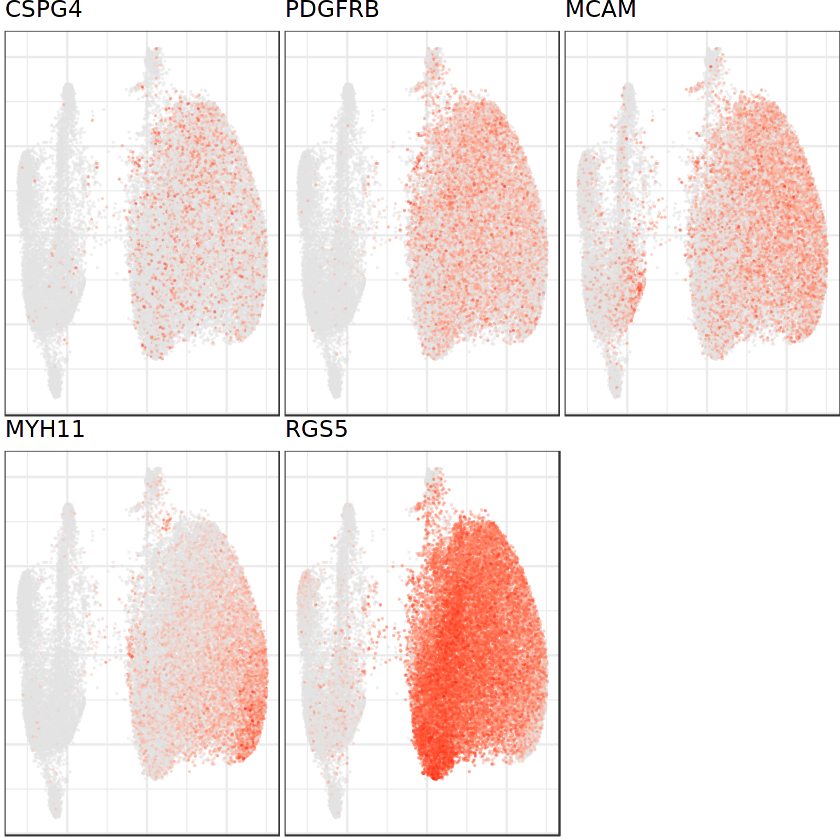

In [18]:
# Pericytes markers

gs = c('CSPG4','PDGFRB','MCAM','MYH11','RGS5')
b = lapply(sn(gs),function(x) conS$plotGraph(gene=x,title=x,size=0.1,raster = TRUE))

fig=cowplot::plot_grid(plotlist=b, ncol=3, nrow=2)
 fig

In [19]:
table(sample.groups)

sample.groups
Normal  Tumor 
    10     14 

In [ ]:
# use cacoa to perform differetial gene expression analysis

In [21]:
library(conos)

library(dplyr)
library(conos)
library(ggplot2)
library(dplyr)
library(cowplot)

library(devtools)
library(Matrix)
library(dplyr)
library(magrittr)
library(org.Hs.eg.db)
library(edgeR)

In [26]:
scon = conS
table(sample.groups)
s.sample.group = sample.groups


target.level <- 'Tumor'
ref.level <- 'Normal'


clu = anoS %>% Toch()
clu = clu[clu!='Fibroblast proliferating']
table(clu)

table(s.sample.group)
library(cacoa)


cao <- Cacoa$new(scon,
                 sample.groups=as.factor(s.sample.group),
                 cell.groups = as.factor(clu),
                 n.cores=20, target.level=target.level, ref.level=ref.level)

sample.groups
Normal  Tumor 
    10     14 

clu
Endothelial-1 Endothelial-2 Endothelial-3 Endothelial-4 Endothelial-5 
         4040          1362           613           584           525 
   Fibroblast    Pericytes1    Pericytes2 
          345         10735          4177 

s.sample.group
Normal  Tumor 
    10     14 

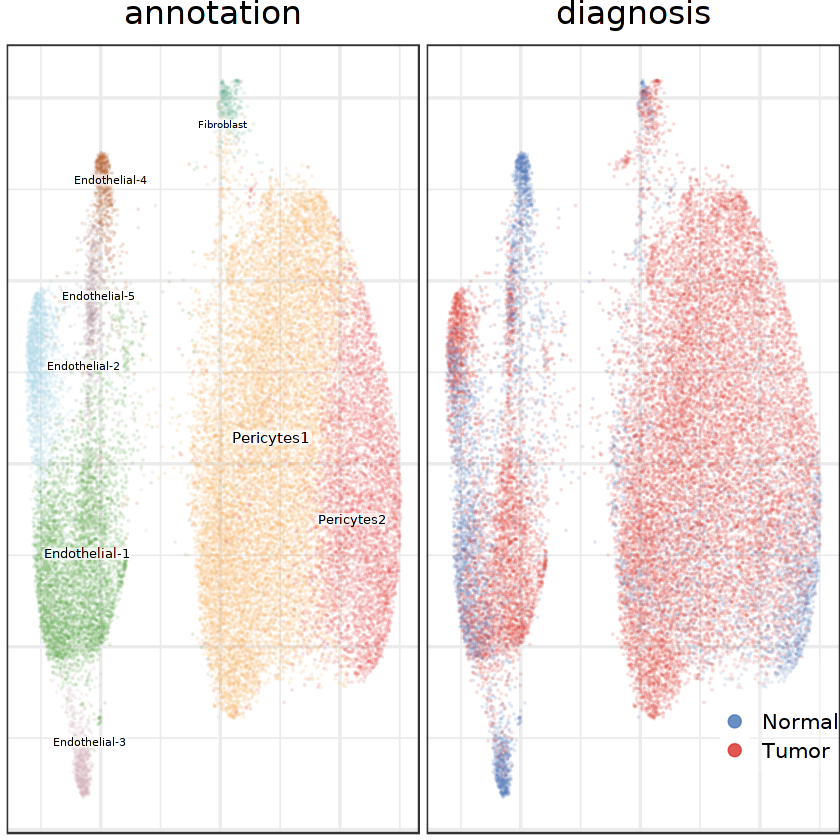

In [27]:
bs <- if (length(levels(cao$cell.groups)) > 20) 10 else 16
cao$plot.theme <- theme_bw(base_size = bs) + 
  theme(plot.title=element_text(hjust = 0.5), 
        legend.background=element_rect(fill=alpha("white", 0.2)),
        legend.text=element_text(size=12), 
        legend.margin=margin(6, 6, 4, 1, 'pt'),
        plot.margin=margin())

theme_set(cao$plot.theme)

set.seed(239)
cao$cell.groups.palette <- levels(cao$cell.groups) %>% 
  {setNames(sample(brewerPalette("Paired")(length(.))), .)}

cao$sample.groups.palette <- c("#d73027", "#4575b4") %>% 
  setNames(c(cao$target.level, cao$ref.level))


example.celltypes <- names(sort(table(cao$cell.groups),decreasing=T))
top1 <- example.celltypes[1]
top2 <- example.celltypes[c(1,2)]

cells.to.contour <- top2
cell.to.go <- example.celltypes[3]

alpha <- 0.1; size <- 0.1;

plot_grid(
  cao$plotEmbedding(color.by='cell.groups', alpha=alpha, size=size, title='annotation', 
                    plot.na=FALSE, show.legend=FALSE, font.size=c(2,3)),
  cao$plotEmbedding(color.by='condition', alpha=alpha, size=size, title='diagnosis', 
                    mark.groups=FALSE,plot.na=F) + 
    theme(legend.position=c(0.85, 0.15)) +
    guides(color=guide_legend(override.aes = list(size=3,alpha=0.8),title=''))
)

In [28]:
cao$estimateDEPerCellType(independent.filtering=TRUE, test='DESeq2.Wald',min.cell.frac=0.01)


In [29]:
org <- org.Hs.eg.db


In [30]:
cao$estimateOntology(type="GSEA", org.db=org, n.top.genes=200)


Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2



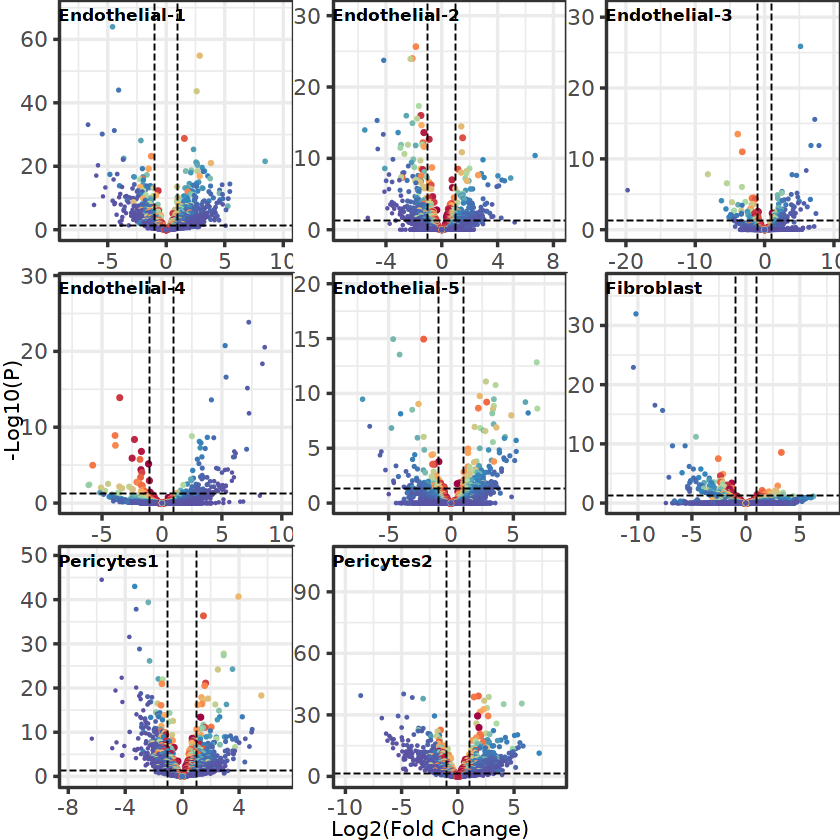

In [31]:
a1=cao$plotVolcano(lf.cutoff=1,p.cutoff=0.05,sel.labels = TRUE,p.name='padj')
a1

clusterProfiler v4.0.0  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:biomaRt’:

    select


The following object is masked from ‘package:AnnotationDbi’:

    select


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:igraph’:

    simplify


The following object is masked from ‘package:stats’:

    filter




[1] "Endothelial-1"


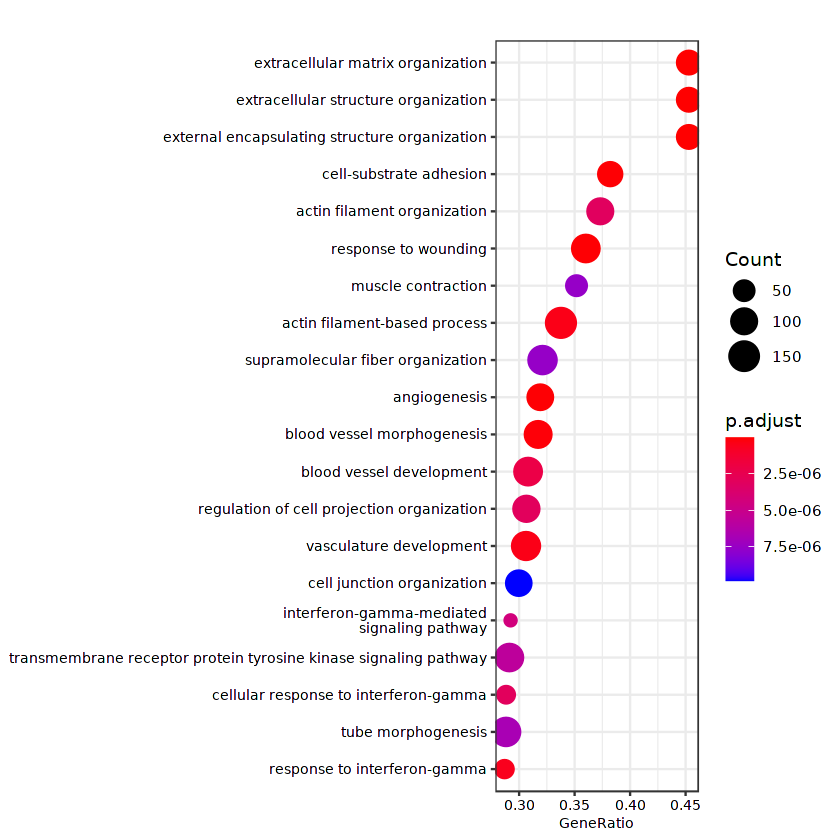

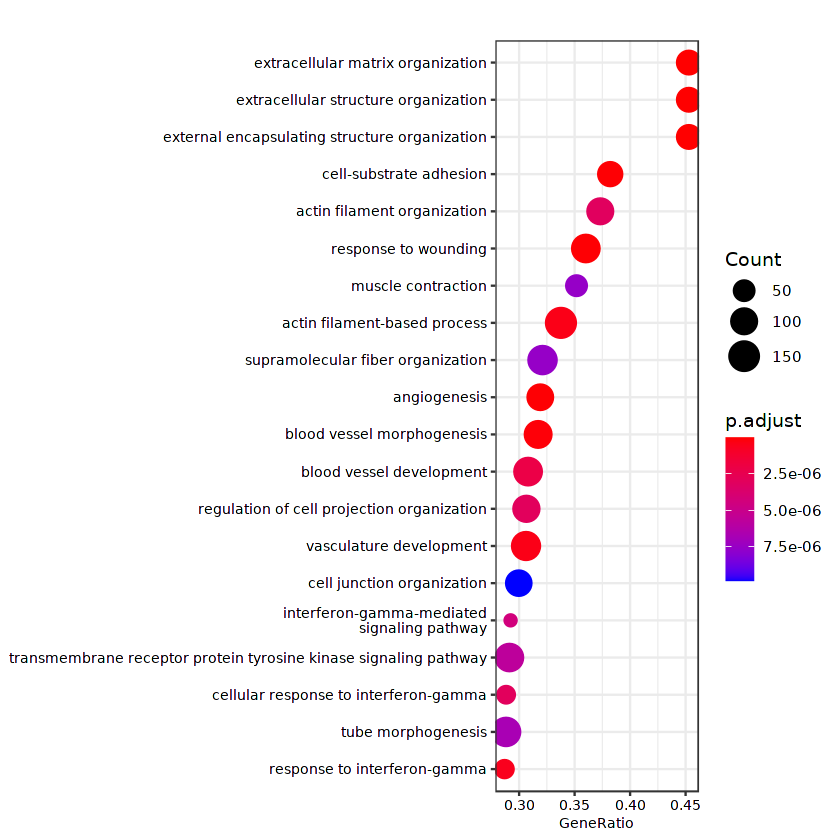

In [32]:
library(clusterProfiler)
cells= "Endothelial-1"
print(cells)

cao$plotOntology(name = "GSEA" ,genes="up", cell.type=cells, plot='dot', font.size=8)
cao$plotOntology( name = "GSEA",genes="down", cell.type=cells, plot='dot', font.size=8)

[1] "blue"
[1] "white"
[1] "red"


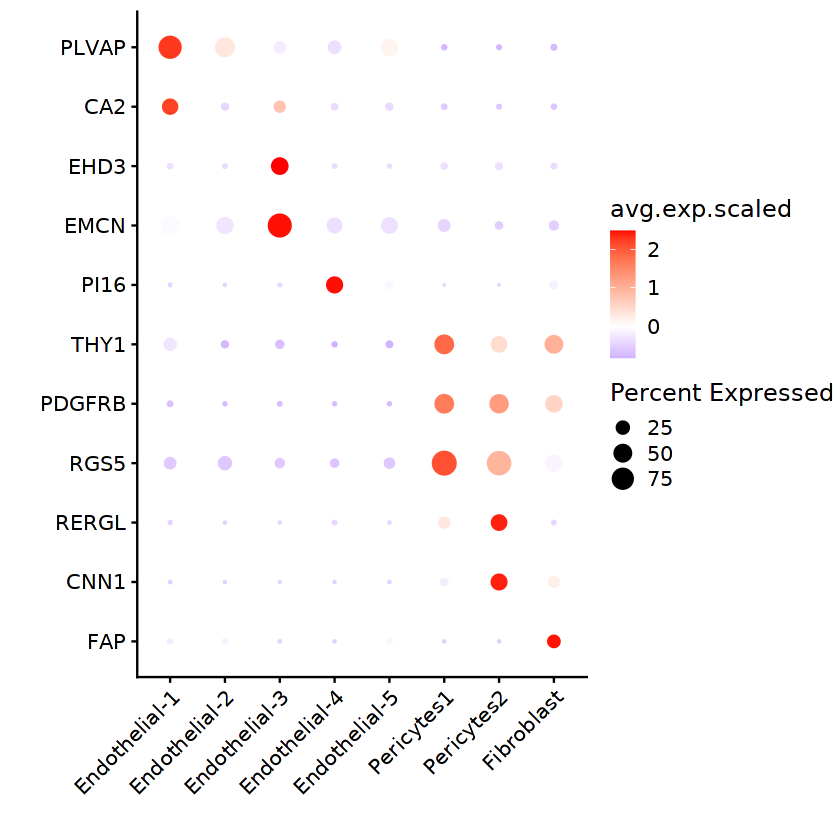

In [34]:
library(cowplot)


gs =c('PLVAP', "CA2",'EHD3' ,'EMCN','PI16','THY1','PDGFRB','RGS5','RERGL','CNN1','FAP')

gs = intersect(gs,colnames(p2S$counts))

anoM = Toch(anoS) %>% .[.!="Fibroblast proliferating"]

anoM =ordered(as.factor(anoM),levels=c("Endothelial-1"    ,        "Endothelial-2"       ,     "Endothelial-3" ,         "Endothelial-4" ,     "Endothelial-5" ,"Pericytes1" ,"Pericytes2"  ,"Fibroblast"     ,          "Fibroblast proliferating"))

cname=names(anoM)
cname = intersect(cname,rownames(p2S$counts))
p=Dotfig(gs,t(p2S$counts)[,cname],anoM[cname],cols = c("blue","white", "red"))

p1=p+xlab('')+ylab('')#+theme(legend.position = 'top')
p1
